In [1]:
import math
import numpy as np
from datetime import timedelta, datetime

import pandas as pd
from vega_datasets import data

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
temp = data.sf_temps()

- Use the above dataset for the exercises below:

In [3]:
temp.date.head(2)

0   2010-01-01 00:00:00
1   2010-01-01 01:00:00
Name: date, dtype: datetime64[ns]

In [4]:
temp.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [5]:
temp.date.dt.month.head()

0    1
1    1
2    1
3    1
4    1
Name: date, dtype: int64

In [6]:
temp.head(2)

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00


In [7]:
temp = temp.set_index('date')

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [8]:
avg_daily = temp.resample('D').mean()

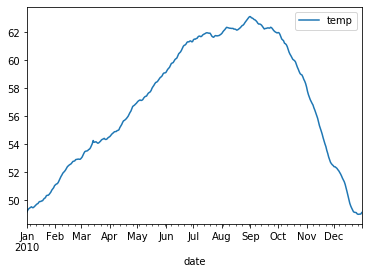

In [9]:
avg_daily.plot()

2. Write the code necessary to visualize the minimum temperature over time.

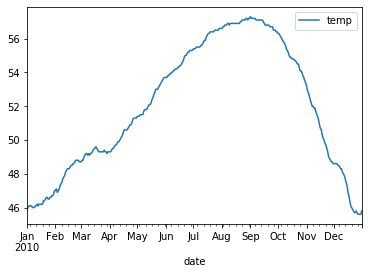

In [10]:
avg_min_daily = temp.resample('D').min()
avg_min_daily.plot()

3. Write the code necessary to visualize the maximum temperature over time.

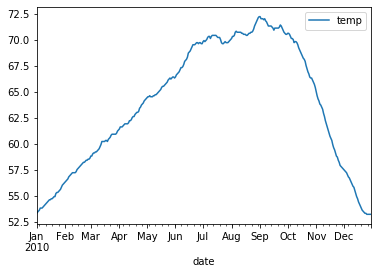

In [11]:
avg_min_daily = temp.resample('D').max()
avg_min_daily.plot()

4. Which month is the coldest, on average?

In [12]:
monthly_avg = temp.resample('M').agg('mean')
monthly_avg

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [13]:
print(monthly_avg[monthly_avg['temp'] == monthly_avg['temp'].min()])

                temp
date                
2010-01-31  49.98414


5. Which month has the highest average temperature?

In [14]:
print(monthly_avg[monthly_avg["temp"] == monthly_avg['temp'].max()])

                 temp
date                 
2010-09-30  62.487083


6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [15]:
agg_daily = temp.resample('D').agg(['min', 'max'])

diff_daily = agg_daily.temp['max'] - agg_daily.temp['min']

diff_daily.head()

date
2010-01-01    7.5
2010-01-02    7.4
2010-01-03    7.4
2010-01-04    7.5
2010-01-05    7.7
Freq: D, dtype: float64

In [16]:
monthly_diff = diff_daily.resample('M').mean()
monthly_diff

date
2010-01-31     8.341935
2010-02-28     9.485714
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
2010-06-30    13.950000
2010-07-31    13.977419
2010-08-31    13.870968
2010-09-30    14.403333
2010-10-31    13.432258
2010-11-30    10.236667
2010-12-31     7.925806
Freq: M, dtype: float64

In [17]:
monthly_diff.idxmax(), monthly_diff.max()

(Timestamp('2010-09-30 00:00:00', freq='M'), 14.40333333333333)

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [18]:
daily_temp = temp.resample('D').agg(['min', 'max', 'mean'])

In [19]:
daily_temp.head()

temp                 
             min   max       mean
date                             
2010-01-01  45.8  53.3  49.170833
2010-01-02  46.0  53.4  49.304167
2010-01-03  46.1  53.5  49.391667
2010-01-04  46.1  53.6  49.445833
2010-01-05  46.1  53.8  49.491667

In [20]:
daily_temp.columns = [p1 + '_' + p2 for p1, p2 in daily_temp.columns]

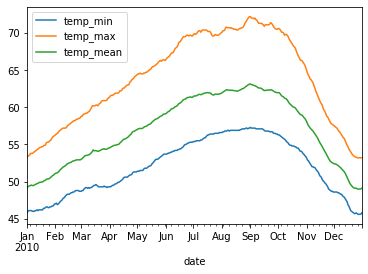

In [21]:
daily_temp.plot()

In [22]:
from vega_datasets import data

- Use the dataset to answer the following questions:

In [23]:
weather = data.seattle_weather()
weather.dtypes
# weather.head()

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

1. Which year and month combination has the highest amount of precipitation?

In [24]:
weather = weather.set_index('date')

In [25]:
weather.weather.value_counts()


sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [26]:
weather.dtypes


precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [34]:
weather.resample('M').precipitation.sum().sort_values().tail()

date
2012-03-31    183.0
2012-11-30    210.5
2015-11-30    212.6
2014-03-31    240.0
2015-12-31    284.5
Name: precipitation, dtype: float64

2. Visualize the amount of monthly precipitation over time.

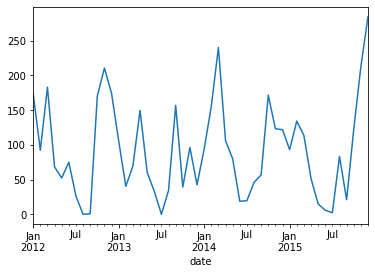

In [36]:
weather.resample('M').precipitation.sum().plot()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [48]:
weather.resample('M').wind.mean().head()

date
2012-01-31    3.900000
2012-02-29    3.903448
2012-03-31    4.248387
2012-04-30    3.373333
2012-05-31    3.354839
Freq: M, Name: wind, dtype: float64

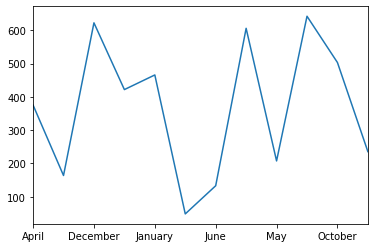

In [50]:
(weather.groupby(weather.index.strftime('%B')).precipitation.sum().plot())

4. Which year-month combination is the windiest?

In [51]:
(weather.groupby(weather.index.strftime('%B')).precipitation.sum().sort_values().tail())

January     466.0
October     503.4
March       606.2
December    622.7
November    642.5
Name: precipitation, dtype: float64

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [53]:
weather['sunny_day'] = weather['weather'] == 'sun'

In [55]:
annual_sun = weather.resample('Y').sunny_day.sum()

In [57]:
annual_sun.idxmax()

Timestamp('2014-12-31 00:00:00', freq='A-DEC')

6. In which month does it rain the most?

In [58]:
weather['did_rain'] = weather.precipitation > 0

In [61]:
weather['did_rain'].head()

date
2012-01-01    False
2012-01-02     True
2012-01-03     True
2012-01-04     True
2012-01-05     True
Name: did_rain, dtype: bool

In [66]:
weather.groupby(weather.index.strftime('%B')).did_rain.sum().idxmax()

'December'

7. Which month has the most number of days with a non-zero amount of precipitation?

- Use the following dataset to answer the following questions:

In [68]:
flights = data.flights_20k().set_index('date')
flights.head()

,delay,destination,distance,origin
date,,,,
2001-01-13 14:56:00,32,SJC,417,SAN
2001-01-31 16:40:00,-5,ISP,1093,FLL
2001-02-11 18:39:00,3,DAL,293,LBB
2001-01-10 21:00:00,-15,MCO,550,MSY
2001-03-30 21:45:00,-2,IND,229,STL


1. Convert any negative delays to 0.

In [70]:
flights.delay = np.where(flights.delay < 0, 0, flights.delay)
flights.head()

,delay,destination,distance,origin
date,,,,
2001-01-13 14:56:00,32,SJC,417,SAN
2001-01-31 16:40:00,0,ISP,1093,FLL
2001-02-11 18:39:00,3,DAL,293,LBB
2001-01-10 21:00:00,0,MCO,550,MSY
2001-03-30 21:45:00,0,IND,229,STL


2. Which hour of the day has the highest average delay?

In [73]:
flights['hour'] = flights.index.hour
flights.head()

,delay,destination,distance,origin,hour
date,,,,,
2001-01-13 14:56:00,32,SJC,417,SAN,14
2001-01-31 16:40:00,0,ISP,1093,FLL,16
2001-02-11 18:39:00,3,DAL,293,LBB,18
2001-01-10 21:00:00,0,MCO,550,MSY,21
2001-03-30 21:45:00,0,IND,229,STL,21


In [78]:
flights.groupby("hour").delay.mean().idxmax()

3

3. Does the day of the week make a difference in the delay amount?

4. Does the month make a difference in the delay amount?

- Use the following dataset to answer the following questions:

In [30]:
from vega_datasets import data

iowa = data.iowa_electricity()

1. For each row, calculate the percentage of the year's total that energy source provided.

2. Lineplot of generation over time, color by source

3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)



4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?



5. Is the total generation increasing over time?

    - How would you control for increasing consumption over time when considering how much energy is coming from each source?

    - Express each number as a % of the year's total

- Use the following dataset to answer the following questions:

- Use the sf_temps dataset

1. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

2. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

3. Create pretty labels for time plots

4. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar